In [60]:
import numpy as np

# Question 1

In [61]:
dim_dict = {}
fractions = {}

In [62]:
for D in range(1,16):
    dim_dict[D] = np.random.rand(1000,D)*2 - 1

In [63]:
dim_dict[2]

array([[-0.78889326,  0.60367636],
       [-0.94801462, -0.56242798],
       [ 0.84748825, -0.71587244],
       ...,
       [ 0.37776847,  0.10210601],
       [-0.54063405, -0.96895912],
       [ 0.64248961,  0.47391855]])

In [ ]:
def dist_to_origin(row):
    length = 0
    for coordinate in row:
        length += coordinate*coordinate
    
    return length**0.5

In [71]:
for key,value in dim_dict.items():
    dist_array = np.apply_along_axis(dist_to_origin,1,value)
    fraction = np.sum(dist_array<=1)/len(dist_array)
    fractions[key] = fraction

In [75]:
import matplotlib.pyplot as plt

# a)

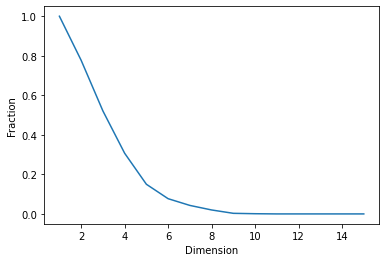

In [86]:
plt.plot(fractions.keys(),fractions.values())
plt.xlabel("Dimension")
plt.ylabel("Fraction");

# b)

### Volume of a unit circle := π * r^2 = c
### Volume of a unit sphere := (4/3) * π * r^3 = s
### c^3 / s^2 = 9π / 16 = Fraction(2)^3 / Fraction(3)^2
### π = 16 * Fraction(2)^3 / (9* Fraction(3)^2)

In [89]:
16*fractions[2]**3/(9*fractions[3]**2)

3.0723103436842627

### Pi is estimated as 3.0723103436842627

# c)

In [99]:
sizes = [500, 1000, 5000, 8000, 10000,25000, 35000, 40000,50000, 70000, 80000, 100000]
dim_dict_2 = {}
fractions_2 = {}

In [100]:
for size in sizes:
    for D in range(1,16):
        dim_dict_2["{0}dim{1}size".format(D,size)] = np.random.rand(size,D)*2 - 1

In [101]:
for key,value in dim_dict_2.items():
    dist_array = np.apply_along_axis(dist_to_origin,1,value)
    fraction = np.sum(dist_array<=1)/len(dist_array)
    fractions_2[key] = fraction

In [102]:
pi_estimates = {}
for size in sizes:
    pi_estimates[size] = 16*fractions_2["2dim{0}size".format(size)]**3/(9*fractions_2["3dim{0}size".format(size)]**2)

In [103]:
pi_estimates

{5000: 3.4669703119327755,
 10000: 3.1524001523293705,
 25000: 3.1229661883519744,
 35000: 3.1170150052428984,
 40000: 3.1172131349264927,
 50000: 3.1105362183448024,
 70000: 3.078963026219355,
 80000: 3.1150035167327297,
 100000: 3.1658166511320855}

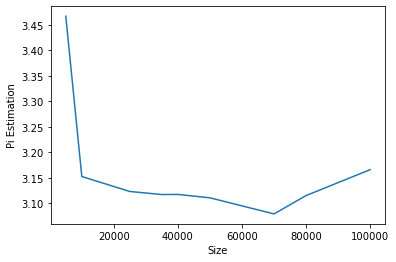

In [105]:
plt.plot(pi_estimates.keys(),pi_estimates.values())
plt.xlabel("Size")
plt.ylabel("Pi Estimation");

### As we see, estimation starts with a high variation but gets closer to and deviates around the pi as the size increases.

# d)

In [107]:
dim_dict_3 = {}
test_data = {}

for D in range(1,16):
    dim_dict_3[D] = np.random.rand(1000,D)*2 - 1

for D in range(1,16):
    test_data[D] = np.random.rand(100,D)*2 - 1

In [120]:
def dist_between(x,y):
    
    if len(x)!=len(y):
        print("Points of unequal dimension")
        return 0
    
    length = 0
    for i in range(0,len(x)):
        length += (x[i]-y[i])**2
    
    return length**0.5

In [121]:
mean_distances = {}

for D in range(1,16):
    min_distances = []
    
    for point_a in test_data[D]:
        distances_a = []
        
        for point_b in dim_dict_3[D]:
            distances_a.append(dist_between(point_a, point_b))
            
        min_distances.append(min(distances_a))
    
    mean_distances[D] = np.mean(min_distances)

In [122]:
mean_distances

{1: 0.00086901779875463,
 2: 0.03163927872273905,
 3: 0.1098731786479491,
 4: 0.22715288471666636,
 5: 0.3784937370219549,
 6: 0.500775654174601,
 7: 0.653632533580176,
 8: 0.7589005585981202,
 9: 0.8787301918651569,
 10: 1.0173298094241414,
 11: 1.130987958124554,
 12: 1.2216680353788352,
 13: 1.4082345265155365,
 14: 1.4979973180256565,
 15: 1.5664759419414045}

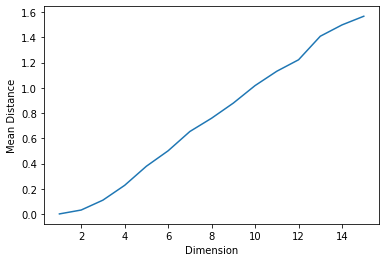

In [123]:
plt.plot(mean_distances.keys(),mean_distances.values())
plt.xlabel("Dimension")
plt.ylabel("Mean Distance");

In [125]:
import os

os.system('jupyter nbconvert --to html Untitled.ipynb')

0